In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn .ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer


# Leitura e interpretação dos dados

In [2]:
##### Leitura dos arquivos ##############

a = np.load('Dados_1.npy')
b = np.load('Dados_2.npy')
c = np.load('Dados_3.npy')
d = np.load('Dados_4.npy') #### DADOS REPETIDOS
e = np.load('Dados_5.npy')
classes = np.load('Classes.npy', allow_pickle=True)

Percebeu-se que os dados lidos do arquivo 'Dados_4.npy' (sensor 4) não havia relevância em relação a todo o conjunto de dados, logo, não possuia necessidade de mantê-los no projeto, devido a elevada repetição de valores. Dessa forma, optou-se por excluí-los da análise.

Logo, realizou-se a discretização dos dados de saída (classes) com o formato numérico, para que fossem aplicados os algoritmos de aprendizado de máquina logo em seguida. Além disso, analisou-se a quantidade de cada uma das cinco classes presentes no banco de dados, onde notou-se que cada uma apresenta a mesma quantidade de ocorrências, concluindo que as classes estavam balanceadas.

In [3]:
classes_num = []
cont_a = 0
cont_b = 0
cont_c = 0
cont_d = 0
cont_e = 0

for i in range(len(classes)):
    if(classes[i]== 'Classe A'):
        cont_a += 1
        classes_num.append(1)
    elif(classes[i]== 'Classe B'):
        cont_b += 1
        classes_num.append(2)
    elif(classes[i]== 'Classe C'):
        cont_c += 1
        classes_num.append(3)
    elif(classes[i]== 'Classe D'):
        cont_d += 1
        classes_num.append(4)
    else:
        cont_e += 1
        classes_num.append(5)

r = np.c_[a,b,c,e,classes_num]

print("Classe A: %d", cont_a)
print("Classe B: %d", cont_b)
print("Classe C: %d", cont_c)
print("Classe D: %d", cont_d)
print("Classe E: %d", cont_e)

df_r = pd.DataFrame(r)

Classe A: %d 10000
Classe B: %d 10000
Classe C: %d 10000
Classe D: %d 10000
Classe E: %d 10000


A seguir, são realizados algumas exclusões necessárias de colunas vazias que vieram de cada arquivo.

In [4]:
# Excluiu-se as colunas que apresentaram valores nulos

df_r = df_r.drop(200, axis = 1)
df_r = df_r.drop(401, axis = 1)
df_r = df_r.drop(602, axis = 1)

Percebeu-se também que o arquivo 'Dados_5.npy' possuia elevado células vazias (cerca de 30 mil instâncias). Dessa forma, optou-se por não excluir essas instâncias com dados nulos, pois equivale a mais da metade dos dados obtidos.

Portanto, resolveu-se tratar esses dados nulos, substituindo-os pela média dos dados de mesmo atributo (coluna).

In [5]:
print("CONTADOR DE NULOS:\n")
print(df_r.isnull().sum())

zeros = df_r.isnull().sum()
df_zeros = pd.DataFrame(zeros)
df_zeros.to_csv("dados_nulos.csv")

CONTADOR DE NULOS:

0         0
1         0
2         0
3         0
4         0
       ... 
799    1231
800    1214
801    1190
802    1242
803       0
Length: 801, dtype: int64


Percebeu-se por meio do arquivo "dados_nulos.csv", que as colunas (atributos) 603 à 802 possui algum elemento nulo. Logo aplicou-se uma substituição desses valores pela média dos valores de toda a coluna.

In [6]:
imputer = SimpleImputer(strategy = 'mean')

i = 603
while (i>=603 and i<=803):
    aux = df_r[i].values.reshape(-1,1)

    aux_imputada = imputer.fit_transform(aux)

    df_r[i] = aux_imputada

    i+=1

i = 0

Após todos os tratamentos realizados no conjunto de dados, gerou-se o seguinte conjunto de entrada e saída para treinamento e teste.

# Seleção de atributos

In [7]:
x = df_r.iloc[:, 1:800].values
y = df_r.iloc[:, 800].values

Como o conjunto de dados possui elevada quantidade de atributos, julga-se importante selecionar atributos com o objetivo de diminuir este número, gerando uma maior eficiência do algoritmo de aprendizado de máquina.

Utilizando o método SelectKBest do scikit-learn, escolheu-se os 400 melhores atributos em relação ao método f_classif, cujo qual, é baseado no método ANOVA.



In [19]:
X_new = SelectKBest( f_classif, k=350).fit_transform(x,y)

# Treinamento dos dados

              precision    recall  f1-score   support

         1.0       0.76      0.75      0.75      3086
         2.0       0.71      0.68      0.69      2955
         3.0       0.65      0.67      0.66      2997
         4.0       0.76      0.79      0.78      3023
         5.0       0.70      0.71      0.70      2939

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000

0.7186


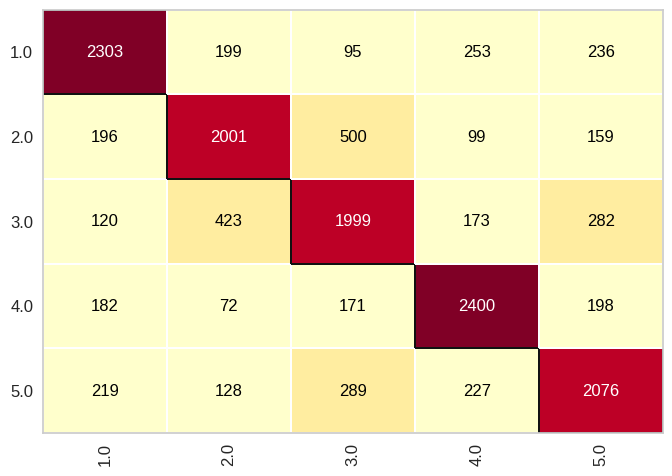

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.30, random_state=1, shuffle=True)

from sklearn.neural_network import MLPClassifier

clf1 = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100, 100), random_state=1)
clf1.fit(X_train, y_train)

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf1)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)

from sklearn.metrics import classification_report, confusion_matrix

previsoes_mlp1 = clf1.predict(X_test)
print(classification_report(y_test, previsoes_mlp1))

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, previsoes_mlp1))

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         1.0       0.71      0.68      0.69      3086
         2.0       0.68      0.67      0.68      2955
         3.0       0.66      0.63      0.64      2997
         4.0       0.74      0.76      0.75      3023
         5.0       0.67      0.72      0.69      2939

    accuracy                           0.69     15000
   macro avg       0.69      0.69      0.69     15000
weighted avg       0.69      0.69      0.69     15000

0.6915333333333333


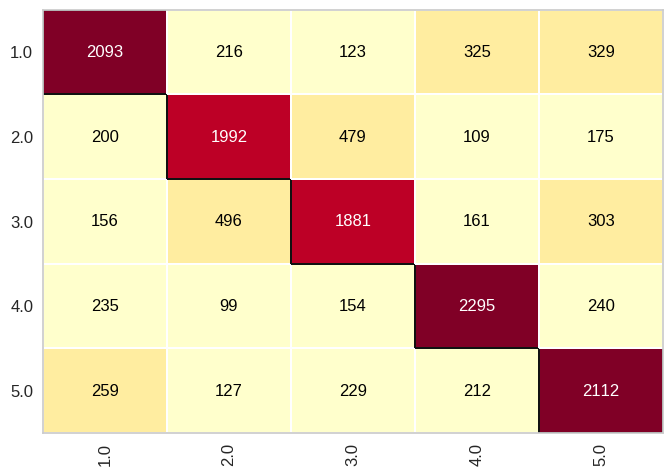

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.30, random_state=1, shuffle=True)


clf2 = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(200,200), random_state=1, activation = 'logistic')
clf2.fit(X_train, y_train)

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf2)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)

from sklearn.metrics import classification_report, confusion_matrix

previsoes_mlp2 = clf2.predict(X_test)
print(classification_report(y_test, previsoes_mlp2))

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, previsoes_mlp2))

plt.show()

Testou-se duas configurações de MLP, onde resultou que a primeira MLP testada atingiu maior acuracidade.

In [37]:
from sklearn.ensemble import RandomForestClassifier

regr = RandomForestClassifier(max_depth=50, random_state=0, criterion = 'gini')
regr.fit(X_train, y_train)


RandomForestClassifier(max_depth=50, random_state=0)

              precision    recall  f1-score   support

         1.0       0.50      0.43      0.47      3086
         2.0       0.50      0.48      0.49      2955
         3.0       0.46      0.49      0.47      2997
         4.0       0.46      0.43      0.44      3023
         5.0       0.42      0.51      0.46      2939

    accuracy                           0.47     15000
   macro avg       0.47      0.47      0.47     15000
weighted avg       0.47      0.47      0.47     15000

0.46653333333333336


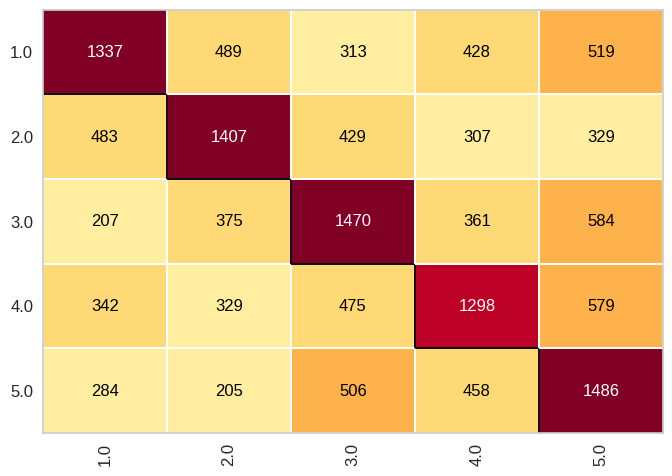

In [38]:
cm = ConfusionMatrix(regr)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)

previsoes_regr = regr.predict(X_test)
print(classification_report(y_test, previsoes_regr))

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, previsoes_regr))

plt.show()

In [40]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, previsoes_mlp1), ": MLP1 acurácia")
print(accuracy_score(y_test, previsoes_mlp2), ": MLP2 acurácia")
print(accuracy_score(y_test, previsoes_regr), ": Random acurácia")

0.7186 : MLP1 acurácia
0.6915333333333333 : MLP2 acurácia
0.46653333333333336 : Random acurácia


# Conclusão

  Durante a execução da tarefa, foi possível observar que há a necessidade de algoritmos de aprendizado de máquina mais otimizados para atingir melhores resultados de acurácia, bem como obter um comportamento da matriz de confusão melhor.

  Como possível solução, tentou-se utilizar as técnicas de grid search para contruir e avaliar um modelo para cada combinação de parâmetros e; validação cruzada, para obter maior abrangência no conjunto de dados de treinamento. Contudo, essas duas técnicas necessitavam de muito tempo de treinamento e análise. Logo, como primeiro contato com esse conjunto de dados de tamanho elevado, optou-se por utilizar técnicas de aprendizado de máquina que não levassem tanto tempo inicialmente.